In [2]:
import pandas as pd
import seaborn as sns
import csv 
import numpy as np

In [3]:
df1 = pd.read_csv('price_demand_data.csv')
df2 = pd.read_csv('weather_data.csv')

In [4]:
df1['Date'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021


In [5]:
data = df1.merge(df2, left_on='Date', right_on='Date')
data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [6]:
data.columns

Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'PRICECATEGORY', 'Date',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'],
      dtype='object')

In [7]:
data.shape

(11663, 25)

In [8]:
data.describe()

,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
count,11663.000000,11615.000000,11615.000000,11567.000000,11663.000000,11663.000000,11519.000000,11615.000000,11615.000000,11663.000000,11567.000000,11663.000000,11663.000000,11615.000000,11615.000000
mean,4925.808274,11.050435,19.444968,1.576900,3.902564,5.349044,34.412796,13.720189,74.454326,5.164537,1017.740572,18.039467,56.931236,5.301679,1015.824839
std,876.444423,3.862339,5.342591,4.489775,2.696787,3.597600,10.887466,4.297780,14.149469,2.557707,7.668102,4.952872,13.989108,2.387307,7.421117
min,2708.530000,1.700000,10.600000,0.000000,0.000000,0.000000,15.000000,3.000000,25.000000,0.000000,989.700000,8.600000,21.000000,0.000000,989.000000
25%,4255.490000,8.100000,15.500000,0.000000,1.800000,2.100000,28.000000,10.900000,65.000000,3.000000,1012.800000,14.400000,48.000000,3.000000,1011.000000
50%,4803.730000,10.900000,18.300000,0.000000,3.200000,4.900000,33.000000,13.400000,75.000000,7.000000,1018.100000,17.100000,56.000000,7.000000,1015.800000
75%,5477.375000,13.800000,21.800000,0.600000,5.600000,8.400000,41.000000,16.400000,84.000000,7.000000,1023.700000,20.200000,66.000000,7.000000,1021.600000
max,8196.830000,22.200000,39.200000,43.200000,13.800000,13.100000,67.000000,30.900000,100.000000,8.000000,1034.200000,35.200000,98.000000,8.000000,1032.400000


In [ ]:
#visulaization

In [9]:
data.isnull().sum()

REGION                                 0
SETTLEMENTDATE                         0
TOTALDEMAND                            0
PRICECATEGORY                          0
Date                                   0
Minimum temperature (°C)              48
Maximum temperature (°C)              48
Rainfall (mm)                         96
Evaporation (mm)                       0
Sunshine (hours)                       0
Direction of maximum wind gust       144
Speed of maximum wind gust (km/h)    144
Time of maximum wind gust            144
9am Temperature (°C)                  48
9am relative humidity (%)             48
9am cloud amount (oktas)               0
9am wind direction                    48
9am wind speed (km/h)                 48
9am MSL pressure (hPa)                96
3pm Temperature (°C)                   0
3pm relative humidity (%)              0
3pm cloud amount (oktas)              48
3pm wind direction                     0
3pm wind speed (km/h)                  0
3pm MSL pressure

In [10]:
data.mean()

TOTALDEMAND                          4925.808274
Minimum temperature (°C)               11.050435
Maximum temperature (°C)               19.444968
Rainfall (mm)                           1.576900
Evaporation (mm)                        3.902564
Sunshine (hours)                        5.349044
Speed of maximum wind gust (km/h)      34.412796
9am Temperature (°C)                   13.720189
9am relative humidity (%)              74.454326
9am cloud amount (oktas)                5.164537
9am MSL pressure (hPa)               1017.740572
3pm Temperature (°C)                   18.039467
3pm relative humidity (%)              56.931236
3pm cloud amount (oktas)                5.301679
3pm MSL pressure (hPa)               1015.824839
dtype: float64

In [11]:
#Fill the null values with mean values
new_data = data.fillna(data.mean())
new_data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,1017.740572,19.4,43,6.0,N,30,1012.2
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,1017.740572,19.4,43,6.0,N,30,1012.2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,1017.740572,19.4,43,6.0,N,30,1012.2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,1017.740572,19.4,43,6.0,N,30,1012.2


In [12]:
new_data.isnull().sum()

REGION                                 0
SETTLEMENTDATE                         0
TOTALDEMAND                            0
PRICECATEGORY                          0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               0
Rainfall (mm)                          0
Evaporation (mm)                       0
Sunshine (hours)                       0
Direction of maximum wind gust       144
Speed of maximum wind gust (km/h)      0
Time of maximum wind gust            144
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)               0
9am wind direction                    48
9am wind speed (km/h)                 48
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   0
3pm relative humidity (%)              0
3pm cloud amount (oktas)               0
3pm wind direction                     0
3pm wind speed (km/h)                  0
3pm MSL pressure

In [17]:
#final_data = new_data.groupby('Date').max('SETTLEMENTDATE')
final_data = new_data.groupby('Date').max('Maximum temperature (°C)')

In [18]:
final_data

,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,
1/01/2021,5019.64,15.6,29.9,0.0000,2.8,9.3,31.0,19.2,77.0,6,1018.8,28.1,43,5.0,1015.3
1/02/2021,5228.29,13.4,20.3,0.0000,7.4,1.6,33.0,16.9,76.0,7,1012.8,19.4,69,7.0,1011.9
1/03/2021,5225.37,13.8,21.7,0.0000,6.4,6.3,44.0,16.6,72.0,6,1012.3,19.7,67,6.0,1012.2
1/04/2021,5807.02,12.4,29.9,0.0000,4.4,10.8,20.0,14.4,86.0,1,1024.3,28.7,30,3.0,1021.6
1/05/2021,5261.09,11.2,24.6,0.0000,5.4,7.1,33.0,14.9,63.0,3,1027.3,24.2,35,7.0,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/04/2021,5688.63,13.8,17.3,6.2000,6.4,7.9,35.0,15.2,59.0,5,1010.0,15.7,62,6.0,1009.6
9/05/2021,5222.89,11.0,20.5,0.4000,0.0,7.1,28.0,13.7,97.0,6,1018.4,19.5,45,3.0,1014.9
9/06/2021,7224.91,7.8,14.7,4.0000,1.6,0.5,67.0,9.7,83.0,7,1010.7,12.3,86,8.0,1008.8


In [20]:
final_data = new_data.groupby('Date').max()
final_data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
1/01/2021,VIC1,1/01/2021 9:30,5019.64,LOW,15.6,29.9,0.0000,2.8,9.3,NNE,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1/02/2021,VIC1,1/02/2021 9:30,5228.29,MEDIUM,13.4,20.3,0.0000,7.4,1.6,S,...,7,N,7,1012.8,19.4,69,7.0,S,13,1011.9
1/03/2021,VIC1,1/03/2021 9:30,5225.37,LOW,13.8,21.7,0.0000,6.4,6.3,S,...,6,WSW,6,1012.3,19.7,67,6.0,S,15,1012.2
1/04/2021,VIC1,1/04/2021 9:30,5807.02,MEDIUM,12.4,29.9,0.0000,4.4,10.8,NNW,...,1,NE,9,1024.3,28.7,30,3.0,SE,7,1021.6
1/05/2021,VIC1,1/05/2021 9:30,5261.09,MEDIUM,11.2,24.6,0.0000,5.4,7.1,N,...,3,NNE,9,1027.3,24.2,35,7.0,N,17,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/04/2021,VIC1,9/04/2021 9:30,5688.63,MEDIUM,13.8,17.3,6.2000,6.4,7.9,S,...,5,W,13,1010.0,15.7,62,6.0,S,17,1009.6
9/05/2021,VIC1,9/05/2021 9:30,5222.89,MEDIUM,11.0,20.5,0.4000,0.0,7.1,NW,...,6,,Calm,1018.4,19.5,45,3.0,WNW,6,1014.9
9/06/2021,VIC1,9/06/2021 9:30,7224.91,MEDIUM,7.8,14.7,4.0000,1.6,0.5,S,...,7,SSW,4,1010.7,12.3,86,8.0,S,20,1008.8


In [ ]:
#visualization

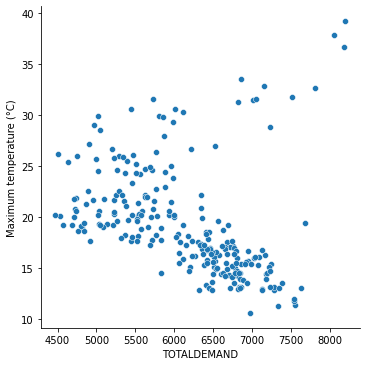

In [15]:
sns.relplot(x='TOTALDEMAND', y='Maximum temperature (°C)', data=final_data)

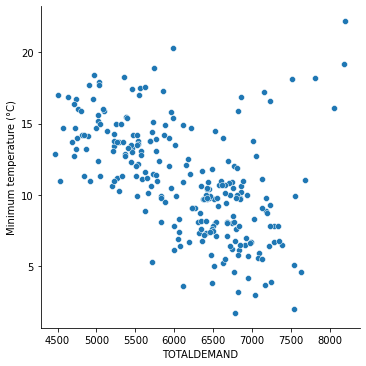

In [16]:
sns.relplot(x='TOTALDEMAND', y='Minimum temperature (°C)', data=final_data)


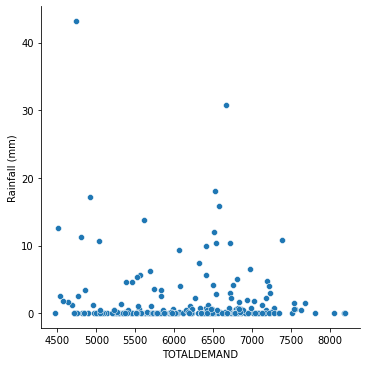

In [42]:
sns.relplot(x='TOTALDEMAND', y='Rainfall (mm)', data=final_data)


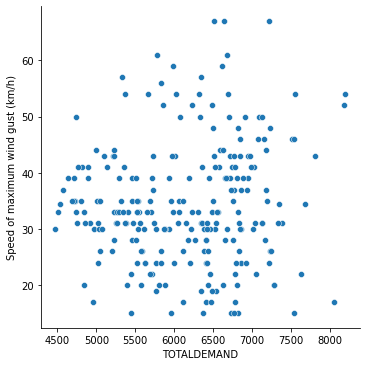

In [43]:
sns.relplot(x='TOTALDEMAND', y='Speed of maximum wind gust (km/h)', data=final_data)